<a href="https://colab.research.google.com/github/ArthurWeb3/Classwork/blob/main/Colab_Link.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
xl = pd.ExcelFile('/content/TableauSalesData.xlsx')
SalesData = xl.parse('Orders')

print(SalesData.head(10))

   Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0    4919  CA-2017-160304 2017-01-02 2017-01-07  Standard Class    BM-11575   
1    4920  CA-2017-160304 2017-01-02 2017-01-07  Standard Class    BM-11575   
2    3074  CA-2017-125206 2017-01-03 2017-01-05     First Class    LR-16915   
3    8604  US-2017-116365 2017-01-03 2017-01-08  Standard Class    CA-12310   
4    8605  US-2017-116365 2017-01-03 2017-01-08  Standard Class    CA-12310   
5    8606  US-2017-116365 2017-01-03 2017-01-08  Standard Class    CA-12310   
6    9494  CA-2017-105207 2017-01-03 2017-01-08  Standard Class    BO-11350   
7    9495  CA-2017-105207 2017-01-03 2017-01-08  Standard Class    BO-11350   
8    2898  US-2017-164630 2017-01-04 2017-01-09  Standard Class    EB-13975   
9    5868  CA-2017-158211 2017-01-04 2017-01-08  Standard Class    BP-11185   

       Customer Name    Segment        Country          City  ... Postal Code  \
0      Brendan Murry  Corporate  United States  G

In [2]:
print(SalesData.columns)

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')


In [3]:
print(SalesData.describe())

            Row ID   Postal Code         Sales     Quantity     Discount  \
count  9994.000000   9994.000000   9994.000000  9994.000000  9994.000000   
mean   4997.500800  55190.379428    229.858001     3.789574     0.156203   
std    2885.162802  32063.693350    623.245101     2.225110     0.206452   
min       1.000000   1040.000000      0.444000     1.000000     0.000000   
25%    2499.250000  23223.000000     17.280000     2.000000     0.000000   
50%    4997.500000  56430.500000     54.490000     3.000000     0.200000   
75%    7495.750000  90008.000000    209.940000     5.000000     0.200000   
max    9994.000000  99301.000000  22638.480000    14.000000     0.800000   

            Profit  
count  9994.000000  
mean     28.656896  
std     234.260108  
min   -6599.978000  
25%       1.728750  
50%       8.666500  
75%      29.364000  
max    8399.976000  


In [4]:
Categories = SalesData["Category"].unique()
print(Categories)

['Furniture' 'Technology' 'Office Supplies']


In [5]:
Segment = SalesData["Segment"].unique()
print(Segment)

['Corporate' 'Consumer' 'Home Office']


In [6]:
#Part 4
SubCatProfits = SalesData[['Sub-Category', 'Profit', 'Sales']]
print(SubCatProfits)

     Sub-Category    Profit    Sales
0       Bookcases   38.2668  173.940
1          Phones   67.2742  231.980
2         Storage   28.6150  114.460
3     Accessories   -5.2640   30.080
4     Accessories   -6.2100  165.600
...           ...       ...      ...
9989      Binders  167.8080  364.800
9990      Storage  -26.7204  152.688
9991    Fasteners    0.5668    3.488
9992     Supplies   -1.3248    5.888
9993      Binders   52.3800  116.400

[9994 rows x 3 columns]


In [7]:
TotalSubCatProfits = SubCatProfits.groupby(by = 'Sub-Category').sum().sort_values(by = 'Profit')
print(TotalSubCatProfits)

                  Profit        Sales
Sub-Category                         
Tables       -17725.4811  206965.5320
Bookcases     -3472.5560  114879.9963
Supplies      -1189.0995   46673.5380
Fasteners       949.5182    3024.2800
Machines       3384.7569  189238.6310
Labels         5546.2540   12486.3120
Art            6527.7870   27118.7920
Envelopes      6964.1767   16476.4020
Furnishings   13059.1436   91705.1640
Appliances    18138.0054  107532.1610
Storage       21278.8264  223843.6080
Chairs        26590.1663  328449.1030
Binders       30221.7633  203412.7330
Paper         34053.5693   78479.2060
Accessories   41936.6357  167380.3180
Phones        44515.7306  330007.0540
Copiers       55617.8249  149528.0300


In [8]:
CategoryProfitSales = SalesData[['Category', 'Profit', 'Sales']].groupby(by = "Category").sum().sort_values(by = 'Profit')
display(CategoryProfitSales)

,Profit,Sales
Category,,
Furniture,18451.2728,741999.7953
Office Supplies,122490.8008,719047.0320
Technology,145454.9481,836154.0330


In [9]:
CategoryProfitSales = SalesData[['Category', 'Sub-Category', 'Profit', 'Sales']]
TotalCatSubCat = CategoryProfitSales.groupby(by=['Category', 'Sub-Category']).sum()
print(TotalCatSubCat)

                                  Profit        Sales
Category        Sub-Category                         
Furniture       Bookcases     -3472.5560  114879.9963
                Chairs        26590.1663  328449.1030
                Furnishings   13059.1436   91705.1640
                Tables       -17725.4811  206965.5320
Office Supplies Appliances    18138.0054  107532.1610
                Art            6527.7870   27118.7920
                Binders       30221.7633  203412.7330
                Envelopes      6964.1767   16476.4020
                Fasteners       949.5182    3024.2800
                Labels         5546.2540   12486.3120
                Paper         34053.5693   78479.2060
                Storage       21278.8264  223843.6080
                Supplies      -1189.0995   46673.5380
Technology      Accessories   41936.6357  167380.3180
                Copiers       55617.8249  149528.0300
                Machines       3384.7569  189238.6310
                Phones      

In [10]:
#Part 5, finding rows using loc function

In [11]:
JustTables = SalesData.loc[SalesData['Sub-Category'] == 'Tables'] 
display(JustTables.head(10))

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
6,9494,CA-2017-105207,2017-01-03,2017-01-08,Standard Class,BO-11350,Bill Overfelt,Corporate,United States,Broken Arrow,...,74012,Central,FUR-TA-10000617,Furniture,Tables,Hon Practical Foundations 30 x 60 Training Tab...,1592.850,7,0.0,350.4270
37,3236,CA-2017-140746,2017-01-15,2017-01-15,Same Day,RC-19825,Roy Collins,Consumer,United States,Fairfield,...,6824,East,FUR-TA-10002903,Furniture,Tables,"Bevis Round Bullnose 29"" High Table Top",181.797,1,0.3,-15.5826
69,9359,CA-2017-168046,2017-01-25,2017-01-28,Second Class,JD-15895,Jonathan Doherty,Corporate,United States,New York City,...,10024,East,FUR-TA-10001095,Furniture,Tables,Chromcraft Round Conference Tables,313.722,3,0.4,-99.3453
82,8927,CA-2017-168032,2017-01-30,2017-02-03,Standard Class,DF-13135,David Flashing,Consumer,United States,Rockford,...,61107,Central,FUR-TA-10004256,Furniture,Tables,Bretford “Just In Time” Height-Adjustable Mult...,626.100,3,0.5,-538.4460
113,8144,CA-2017-100993,2017-02-05,2017-02-10,Standard Class,AZ-10750,Annie Zypern,Consumer,United States,San Diego,...,92037,West,FUR-TA-10001095,Furniture,Tables,Chromcraft Round Conference Tables,557.728,4,0.2,6.9716
130,7813,CA-2017-134334,2017-02-14,2017-02-15,First Class,DK-13090,Dave Kipp,Consumer,United States,Clinton,...,20735,East,FUR-TA-10002356,Furniture,Tables,Bevis Boat-Shaped Conference Table,550.431,3,0.3,-47.1798
172,1083,US-2017-143819,2017-03-01,2017-03-05,Standard Class,KD-16270,Karen Daniels,Consumer,United States,Yonkers,...,10701,East,FUR-TA-10001095,Furniture,Tables,Chromcraft Round Conference Tables,836.592,8,0.4,-264.9208
183,4003,CA-2017-145730,2017-03-03,2017-03-08,Standard Class,CC-12220,Chris Cortes,Consumer,United States,San Antonio,...,78207,Central,FUR-TA-10004915,Furniture,Tables,"Office Impressions End Table, 20-1/2""H x 24""W ...",637.896,3,0.3,-127.5792
204,8985,CA-2017-110898,2017-03-06,2017-03-12,Standard Class,LC-16870,Lena Cacioppo,Consumer,United States,Chicago,...,60623,Central,FUR-TA-10000849,Furniture,Tables,Bevis Rectangular Conference Tables,145.980,2,0.5,-99.2664
233,1462,US-2017-128902,2017-03-11,2017-03-15,Standard Class,MB-18085,Mick Brown,Consumer,United States,Vineland,...,8360,East,FUR-TA-10001095,Furniture,Tables,Chromcraft Round Conference Tables,244.006,2,0.3,-31.3722


In [12]:
JustBookcases = SalesData.loc[SalesData['Sub-Category'] == 'Bookcases'] 
display(JustBookcases.head(10))

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,4919,CA-2017-160304,2017-01-02,2017-01-07,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,20877,East,FUR-BO-10004709,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",173.940,3,0.00,38.2668
17,6851,US-2017-100461,2017-01-08,2017-01-12,Standard Class,JO-15145,Jack O'Briant,Corporate,United States,Franklin,...,53132,Central,FUR-BO-10002545,Furniture,Bookcases,"Atlantic Metals Mobile 3-Shelf Bookcases, Cust...",1565.880,6,0.00,407.1288
52,2472,US-2017-135923,2017-01-22,2017-01-28,Standard Class,CM-11935,Carlos Meador,Consumer,United States,Fayetteville,...,28314,South,FUR-BO-10002213,Furniture,Bookcases,"Sauder Forest Hills Library, Woodland Oak Finish",451.136,4,0.20,-67.6704
78,7566,US-2017-166660,2017-01-30,2017-02-01,Second Class,TB-21250,Tim Brockman,Consumer,United States,Seattle,...,98103,West,FUR-BO-10000468,Furniture,Bookcases,O'Sullivan 2-Shelf Heavy-Duty Bookcases,48.580,1,0.00,7.7728
104,1387,US-2017-108504,2017-02-05,2017-02-05,Same Day,PP-18955,Paul Prost,Home Office,United States,Smyrna,...,30080,South,FUR-BO-10004015,Furniture,Bookcases,"Bush Andora Bookcase, Maple/Graphite Gray Finish",239.980,2,0.00,52.7956
224,1876,US-2017-112977,2017-03-10,2017-03-16,Standard Class,CJ-12010,Caroline Jumper,Consumer,United States,Long Beach,...,11561,East,FUR-BO-10003272,Furniture,Bookcases,O'Sullivan Living Dimensions 5-Shelf Bookcases,176.784,1,0.20,-22.0980
265,3929,CA-2017-162082,2017-03-14,2017-03-17,First Class,JS-15880,John Stevenson,Consumer,United States,Harlingen,...,78550,Central,FUR-BO-10004409,Furniture,Bookcases,"Safco Value Mate Series Steel Bookcases, Baked...",241.332,5,0.32,-14.1960
287,2226,CA-2017-106383,2017-03-19,2017-03-21,Second Class,BT-11440,Bobby Trafton,Consumer,United States,Littleton,...,80122,West,FUR-BO-10002202,Furniture,Bookcases,"Atlantic Metals Mobile 2-Shelf Bookcases, Cust...",72.294,1,0.70,-98.8018
307,9130,CA-2017-130911,2017-03-24,2017-03-26,Second Class,DC-12850,Dan Campbell,Consumer,United States,Cleveland,...,44105,East,FUR-BO-10004357,Furniture,Bookcases,O'Sullivan Living Dimensions 3-Shelf Bookcases,301.470,3,0.50,-241.1760
329,6382,CA-2017-127236,2017-03-29,2017-04-02,Standard Class,TB-21595,Troy Blackwell,Consumer,United States,Springfield,...,45503,East,FUR-BO-10004015,Furniture,Bookcases,"Bush Andora Bookcase, Maple/Graphite Gray Finish",299.975,5,0.50,-167.9860


In [13]:
TableProdProfSales = JustTables[['Product Name', 'Profit','Sales']].groupby('Product Name').sum().sort_values('Profit')
display(TableProdProfSales)

,Profit,Sales
Product Name,,
Chromcraft Bull-Nose Wood Oval Conference Tables & Bases,-2876.1156,9917.6400
Bush Advantage Collection Racetrack Conference Table,-1934.3976,9544.7250
Balt Solid Wood Round Tables,-1201.0581,6518.7540
BoxOffice By Design Rectangular and Half-Moon Meeting Room Tables,-1148.4375,1706.2500
"Riverside Furniture Oval Coffee Table, Oval End Table, End Table with Drawer",-1147.4000,4446.1750
Bretford “Just In Time” Height-Adjustable Multi-Task Work Tables,-964.1940,5634.9000
"Bevis Oval Conference Table, Walnut",-856.0144,6942.0680
BPI Conference Tables,-795.9725,2241.8675
Hon 94000 Series Round Tables,-681.2140,7404.5000


In [14]:
SubCatSalesProf = SalesData[['Segment','Sub-Category','Sales','Profit',]]
CorpTableSalesProf = SubCatSalesProf.loc[(SubCatSalesProf ['Segment']== 'Corporate') & (SubCatSalesProf["Sub-Category"]== 'Tables')]
TotalCorpTablesSalesProf = CorpTableSalesProf.groupby(by = ['Segment', 'Sub-Category']).sum().round()
display(TotalCorpTablesSalesProf)


,,Sales,Profit
Segment,Sub-Category,,
Corporate,Tables,70872.0,-4906.0


In [15]:
JustTables = SalesData.loc[SalesData['Sub-Category']== "Tables"]
TableProf = JustTables[['Product Name', 'Profit']].groupby('Product Name').sum()
NegTables = TableProf[TableProf["Profit"] < 0.0]
display(NegTables)

,Profit
Product Name,
Anderson Hickey Conga Table Tops & Accessories,-17.5145
BPI Conference Tables,-795.9725
Balt Solid Wood Rectangular Table,-216.2545
Balt Solid Wood Round Tables,-1201.0581
Balt Split Level Computer Training Table,-357.9750
"Barricks 18"" x 48"" Non-Folding Utility Table with Bottom Storage Shelf",-104.8320
Bevis 44 x 96 Conference Tables,-164.7200
Bevis Boat-Shaped Conference Table,-445.5870
"Bevis Oval Conference Table, Walnut",-856.0144


In [16]:
#1 
CatOS_table = SalesData[["Category", "Sub-Category", "Sales", "Profit"]]
table2 = CatOS_table.loc[(CatOS_table["Category"] == "Office Supplies")]
output = table2.groupby(by = ["Sub-Category"]).sum()
print(output)

                   Sales      Profit
Sub-Category                        
Appliances    107532.161  18138.0054
Art            27118.792   6527.7870
Binders       203412.733  30221.7633
Envelopes      16476.402   6964.1767
Fasteners       3024.280    949.5182
Labels         12486.312   5546.2540
Paper          78479.206  34053.5693
Storage       223843.608  21278.8264
Supplies       46673.538  -1189.0995


In [17]:
#2
table = SalesData[["Category", "Sub-Category", "Sales", "Profit", "Product Name"]]
new_table = table.loc[(table["Category"] == "Office Supplies")]
total = new_table.groupby(by = ["Product Name"]).sum()
output = total.sort_values(by = "Profit", ascending = "False")
print(output)

                                                        Sales     Profit
Product Name                                                            
GBC DocuBind P400 Electric Binding System           17965.068 -1878.1662
Martin Yale Chadless Opener Electric Letter Opener  16656.200 -1299.1836
3.6 Cubic Foot Counter Height Office Refrigerator    2946.200  -872.0752
Tennsco Single-Tier Lockers                          9158.296  -825.7480
SAFCO Commercial Wire Shelving, Black                4199.456  -635.4440
...                                                       ...        ...
Ibico Ibimaster 300 Manual Binding System            7985.383  2318.3370
Fellowes PB300 Plastic Comb Binding Machine          8070.192  2518.0551
Honeywell Enviracaire Portable HEPA Air Cleaner...  11304.440  3247.0200
Ibico EPK-21 Electric Binding System                15875.916  3345.2823
Fellowes PB500 Electric Punch Plastic Comb Bind...  27453.384  7753.0390

[1058 rows x 2 columns]


In [18]:
#3
display(output[output["Profit"] > 0])

,Sales,Profit
Product Name,,
"Avery Trapezoid Extra Heavy Duty 4"" Binders",314.550,2.131628e-14
Bagged Rubber Bands,25.704,3.024000e-01
Letter Slitter,10.080,3.024000e-01
Hoover Replacement Belt for Commercial Guardsman Heavy-Duty Upright Vacuum,9.768,4.440000e-01
Alliance Rubber Bands,13.440,5.376000e-01
...,...,...
Ibico Ibimaster 300 Manual Binding System,7985.383,2.318337e+03
Fellowes PB300 Plastic Comb Binding Machine,8070.192,2.518055e+03
Honeywell Enviracaire Portable HEPA Air Cleaner for 17' x 22' Room,11304.440,3.247020e+03


In [19]:
#Part 6

JustTables = SalesData.loc[SalesData['Sub-Category']=='Tables']

In [20]:
TableSegment = JustTables[['Segment', 'Profit', 'Sales']]
SegTotalProfSales = TableSegment.groupby('Segment').sum().sort_values('Profit')
print(SegTotalProfSales)

                Profit       Sales
Segment                           
Consumer    -9728.0378  99933.7950
Corporate   -4906.4986  70871.7175
Home Office -3090.9447  36160.0195


In [21]:
TableRegion = JustTables[['Region', 'Profit', 'Sales']]
RegionTotalProfSales = TableRegion.groupby('Region').sum().sort_values('Profit')
print(RegionTotalProfSales)

             Profit      Sales
Region                        
East    -11025.3801  39139.807
South    -4623.0579  43916.192
Central  -3559.6504  39154.971
West      1482.6073  84754.562


In [22]:
TableSegRegion = JustTables[['Segment', 'Region', 'Profit', 'Sales']]
WestTableSegment = TableSegRegion.loc[TableSegRegion['Region']=='West']
WestProfSales = WestTableSegment.groupby('Segment').sum().sort_values('Profit')
print(WestProfSales)

                Profit      Sales
Segment                          
Home Office  -113.5648  16009.185
Consumer      521.9717  40607.486
Corporate    1074.2004  28137.891


In [23]:
JustTablesDiscount = JustTables[['Product Name','Discount','Profit']]
AveDiscount = JustTables = JustTablesDiscount.mean()
print(AveDiscount)
JustTablesAveDiscount = JustTablesDiscount.groupby('Product Name').mean().sort_values('Discount',ascending = False)
print(JustTablesAveDiscount.head(25))

Discount     0.261285
Profit     -55.565771
dtype: float64
                                                    Discount      Profit
Product Name                                                            
BoxOffice By Design Rectangular and Half-Moon M...  0.483333 -382.812500
Bevis Rectangular Conference Tables                 0.475000 -146.709900
Balt Split Level Computer Training Table            0.380000  -71.595000
BPI Conference Tables                               0.370000 -159.194500
Riverside Furniture Stanwyck Manor Table Series     0.366667 -138.644167
Bush Advantage Collection Racetrack Conference ...  0.350000 -276.342514
Bevis Traditional Conference Table Top, Plinth ...  0.333333 -152.234400
Hon 30" x 60" Table with Locking Drawer             0.333333  -59.117067
Chromcraft Bull-Nose Wood 48" x 96" Rectangular...  0.333333 -101.931300
Hon Rectangular Conference Tables                   0.325000  -73.953750
KI Conference Tables                                0.325000  -59

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [24]:
#Part 7 Correlation between table discounts and sales & dates

In [25]:
JustTables = SalesData.loc[SalesData['Sub-Category']=='Tables']

import scipy.stats
x = "Discount"
y = "Sales"
GetCorrelation = scipy.stats.spearmanr(JustTables[x], JustTables[y])

Corr = GetCorrelation[0]
CorrRounded = str(Corr.round(2))

pValue = GetCorrelation[1]
pValuerounded = str(pValue.round(5))

print('The correlation between' + x + 'and' + y + 'is:' + CorrRounded)
print('At p value:' + pValuerounded)

The correlation betweenDiscountandSalesis:-0.29
At p value:0.0


In [26]:
JustTablesYears = JustTables.copy()
JustTablesYears['Year'] = JustTablesYears['Order Date'].dt.year
print(JustTablesYears.columns)

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'Year'],
      dtype='object')


In [27]:
YearlyProfSales = JustTablesYears[['Year', 'Profit', 'Sales']].groupby('Year').sum()
print('The yearly profit and sales for tables are:')
print(YearlyProfSales)

The yearly profit and sales for tables are:
         Profit       Sales
Year                       
2017 -2950.9418  60833.2005
2018 -8140.6947  60893.5425
2019 -3124.0427  46088.3655
2020 -3509.8019  39150.4235


In [28]:
#ICW Region, Segment, & Temporal Effects

#1
JustCopiers = SalesData.loc[SalesData['Sub-Category']=='Copiers']

In [29]:
#2
TableSegRegion = JustCopiers[['Segment', 'Region', 'Profit', 'Sales']]
EastTableSeg = TableSegRegion.loc[TableSegRegion['Region']=='East']
EastProfSales = EastTableSeg.groupby('Segment').sum().sort_values('Profit')
print(EastProfSales)

                Profit      Sales
Segment                          
Corporate    1134.9765   4219.914
Home Office  7229.9328  18599.842
Consumer     8657.9325  30399.706


In [30]:
#3
TableSeg = JustCopiers[['Segment', 'Profit', 'Sales']]
SegTotalProfSales = TableSeg.groupby('Segment').sum().sort_values('Profit')
print(SegTotalProfSales)

                 Profit      Sales
Segment                           
Home Office  12543.8354  32879.574
Corporate    18990.2789  46829.386
Consumer     24083.7106  69819.070


In [31]:
#4
JustCopiers = SalesData.loc[SalesData['Sub-Category']=='Copiers']

JustCopiersMonths = JustCopiers.copy()
JustCopiersMonths['Month'] = JustCopiersMonths['Order Date'].dt.month

JustCopiers = JustCopiersMonths[['Month','Sales','Profit']]
AverageProfit = JustCopiers.mean()
print(AverageProfit)
JustCopiersAverageProfit = JustCopiers.groupby('Month').mean()
print(JustCopiersAverageProfit.head(25))

Month        7.852941
Sales     2198.941618
Profit     817.909190
dtype: float64
             Sales       Profit
Month                          
1      1979.959000   749.986500
3      3198.717000  1380.549925
4       969.973000   321.740975
5      2628.541429   531.421286
6       899.970000   314.989500
7      1397.113143   394.563614
8      1145.980000   400.992960
9      1146.638000   427.211233
10     6169.959333  2643.983000
11     2164.269143   897.280486
12     1566.637500   582.906458


In [32]:
JustCopiers = SalesData.loc[SalesData['Sub-Category']=='Copiers']
JustCopiers = JustCopiers[['Product Name','Sales','Profit']]
AverageProfit = JustCopiers.mean()
print(AverageProfit)
JustCopiersAverageProfit = JustCopiers.groupby('Product Name').mean().sort_values('Sales',ascending = False)
print(JustCopiersAverageProfit.head(25))

Sales     2198.941618
Profit     817.909190
dtype: float64
                                                           Sales       Profit
Product Name                                                                 
Canon imageCLASS 2200 Advanced Copier               12319.964800  5039.985600
Canon PC1060 Personal Laser Copier                   2904.958500  1142.733675
Hewlett Packard LaserJet 3310 Copier                 2354.960750   872.985450
Canon Image Class D660 Copier                        1979.967000   845.985900
Canon PC940 Copier                                   1889.958000   697.484500
Canon Imageclass D680 Copier / Fax                   1791.974400   559.992000
Sharp AL-1530CS Digital Copier                       1599.968000   516.239675
Canon PC1080F Personal Copier                        1499.975000   493.491775
Hewlett Packard 610 Color Digital Copier / Printer   1271.403143   446.419643
Hewlett Packard 310 Color Digital Copier              699.976667   139.995333
Broth

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


In [33]:
#Part 8 
JustTables = SalesData.loc[SalesData["Sub-Category"]=="Tables"]
RegJustTableDiscount = JustTables[["Region", "Discount",]].groupby('Region').mean()
print(RegJustTableDiscount)

         Discount
Region           
Central  0.262500
East     0.373750
South    0.222549
West     0.200000


In [34]:
JustTables = SalesData.loc[SalesData["Sub-Category"]=="Tables"]
JustTablesYear = JustTables.copy()
JustTablesYear['Year'] = JustTablesYear["Order Date"].dt.year
Years = JustTablesYear.Year.unique()
#print years
RegJustTableYear = JustTablesYear[["Region", "Year", "Discount"]]
for year in Years:
  OneYear = RegJustTableYear.loc[RegJustTableYear['Year'] == year]
  NoYear = OneYear[['Region', 'Discount']]
  YearlyRegDiscount = NoYear.groupby('Region').mean()
  print('\nRegional table discounts for the year: ' + str(year))
  #results
  print(YearlyRegDiscount)
  print("*"*40)
  


Regional table discounts for the year: 2017
         Discount
Region           
Central  0.205882
East     0.368182
South    0.250000
West     0.240625
****************************************

Regional table discounts for the year: 2018
         Discount
Region           
Central  0.292308
East     0.373913
South    0.270588
West     0.178947
****************************************

Regional table discounts for the year: 2019
         Discount
Region           
Central  0.326667
East     0.380000
South    0.113636
West     0.208000
****************************************

Regional table discounts for the year: 2020
         Discount
Region           
Central  0.207143
East     0.373333
South    0.218750
West     0.166667
****************************************


In [35]:
JustTables = SalesData.loc[SalesData["Sub-Category"]=="Tables"]
JustTablesYear = JustTables.copy()
JustTablesYear['Year'] = JustTablesYear["Order Date"].dt.year
Years = JustTablesYear.Year.unique()
SegJustTableYear = JustTablesYear[['Segment','Year','Discount']]
for year in Years:
  OneYear = SegJustTableYear.loc[SegJustTableYear['Year']== year]
  NoYear = OneYear[['Segment', 'Discount']]
  YearlySegDiscount = NoYear.groupby('Segment').mean()
  print('\nTable discounts by customer segment for the year: ' + str(year))
  display(YearlySegDiscount)
  display('*'*40)


Table discounts by customer segment for the year: 2017


,Discount
Segment,
Consumer,0.263095
Corporate,0.265714
Home Office,0.300000


'****************************************'


Table discounts by customer segment for the year: 2018


,Discount
Segment,
Consumer,0.254444
Corporate,0.279032
Home Office,0.267857


'****************************************'


Table discounts by customer segment for the year: 2019


,Discount
Segment,
Consumer,0.293243
Corporate,0.261538
Home Office,0.162500


'****************************************'


Table discounts by customer segment for the year: 2020


,Discount
Segment,
Consumer,0.255714
Corporate,0.200000
Home Office,0.222222


'****************************************'

In [36]:
#create a numpy array of UNIQUE regions
Regions = JustTables.Region.unique()
TableSegRegion = JustTables[['Segment', 'Region', 'Profit', 'Sales']]
#loop through regions array
for region in Regions:
  #with each loop, variable region takes on different region value
  #.loc function finds rows with specific region, ignoring remainder of loop.
  TableSegment = TableSegRegion.loc[TableSegRegion['Region']==region]
  TableSegmentProfSales = TableSegment.groupby('Segment').sum().sort_values('Profit')
  #next print() line is to improve legibility
  print('\nThe table sub-category profits and sales for each customer segment in the ' + region + 'are as follows:')
  #data output, different with each loop
  print(TableSegmentProfSales)
  #visual formatting 
  print('-'*40)


The table sub-category profits and sales for each customer segment in the Centralare as follows:
                Profit      Sales
Segment                          
Consumer    -3964.1571  20835.000
Home Office  -302.6739   5757.378
Corporate     707.1806  12562.593
----------------------------------------

The table sub-category profits and sales for each customer segment in the Eastare as follows:
                Profit      Sales
Segment                          
Corporate   -5299.6557  17551.558
Consumer    -3708.3528  14082.467
Home Office -2017.3716   7505.782
----------------------------------------

The table sub-category profits and sales for each customer segment in the Westare as follows:
                Profit      Sales
Segment                          
Home Office  -113.5648  16009.185
Consumer      521.9717  40607.486
Corporate    1074.2004  28137.891
----------------------------------------

The table sub-category profits and sales for each customer segment in the Sout

In [37]:
#Code to look at Table customer segment discounts by year and region
JustTables = SalesData.loc[SalesData["Sub-Category"]=="Tables"]
JustTablesYear = JustTables.copy()
JustTablesYear['Year'] = JustTablesYear["Order Date"].dt.year
Years = JustTablesYear.Year.unique()
Regions = JustTablesYear.Region.unique()
SegJustTableYear = JustTablesYear [['Segment', 'Year', 'Discount', 'Region']]
#looping through year array
for year in Years:
  OneYear = SegJustTableYear.loc[SegJustTableYear["Year"]==year]
  NoYear = OneYear[['Segment','Discount','Region']]
  #looping through region array
  for region in Regions:
    OneRegion = NoYear.loc[NoYear['Region']==region]
    YearlySegRegDiscount = OneRegion.groupby('Segment').mean()
    print('\n' + str(year) + 'Table discounts by customer segment in the ' + region + ' region')
    print(YearlySegRegDiscount)
    print('-'*40)


2017Table discounts by customer segment in the Central region
             Discount
Segment              
Consumer         0.32
Corporate        0.06
Home Office      0.00
----------------------------------------

2017Table discounts by customer segment in the East region
             Discount
Segment              
Consumer     0.336364
Corporate    0.400000
Home Office  0.400000
----------------------------------------

2017Table discounts by customer segment in the West region
             Discount
Segment              
Consumer     0.208333
Corporate    0.220000
Home Office  0.380000
----------------------------------------

2017Table discounts by customer segment in the South region
           Discount
Segment            
Consumer   0.183333
Corporate  0.350000
----------------------------------------

2018Table discounts by customer segment in the Central region
             Discount
Segment              
Consumer     0.293333
Corporate    0.320000
Home Office  0.266667
---------

In [38]:
TablesProduct = JustTables[['Product Name', 'Profit', 'Discount']]
TablesTotalProfAveDiscount = TablesProduct.groupby('Product Name').agg({'Profit':'sum', 'Discount':"mean"})
display(TablesTotalProfAveDiscount)

,Profit,Discount
Product Name,,
Anderson Hickey Conga Table Tops & Accessories,-17.5145,0.300000
BPI Conference Tables,-795.9725,0.370000
Balt Solid Wood Rectangular Table,-216.2545,0.262500
Balt Solid Wood Round Tables,-1201.0581,0.200000
Balt Split Level Computer Training Table,-357.9750,0.380000
"Barricks 18"" x 48"" Non-Folding Utility Table with Bottom Storage Shelf",-104.8320,0.320000
"Barricks Non-Folding Utility Table with Steel Legs, Laminate Tops",15.3522,0.200000
Bevis 36 x 72 Conference Tables,448.1640,0.162500
Bevis 44 x 96 Conference Tables,-164.7200,0.180000


In [39]:
BookcasesProduct = JustBookcases[['Product Name', 'Profit', 'Discount']]
BookcasesTotalProfAveDiscount = BookcasesProduct.groupby('Product Name').agg({'Profit':'sum', 'Discount':"mean"})
print(BookcasesTotalProfAveDiscount)

                                                      Profit  Discount
Product Name                                                          
Atlantic Metals Mobile 2-Shelf Bookcases, Custo... -113.2606  0.510000
Atlantic Metals Mobile 3-Shelf Bookcases, Custo...  780.3302  0.183750
Atlantic Metals Mobile 4-Shelf Bookcases, Custo... -126.4410  0.266667
Atlantic Metals Mobile 5-Shelf Bookcases, Custo...   15.0490  0.316250
Bestar Classic Bookcase                            -612.9387  0.315000
Bush Andora Bookcase, Maple/Graphite Gray Finish    135.5887  0.166667
Bush Birmingham Collection Bookcase, Dark Cherry   -117.8820  0.300000
Bush Cubix Collection Bookcases, Fully Assembled     48.6156  0.233333
Bush Heritage Pine Collection 5-Shelf Bookcase,... -208.6504  0.233750
Bush Mission Pointe Library                          24.1568  0.173333
Bush Saratoga Collection 5-Shelf Bookcase, Hano...  -12.6882  0.150000
Bush Somerset Collection Bookcase                   -56.3214  0.212500
Bush W

In [40]:
JustBookcases = SalesData.loc[SalesData["Sub-Category"]=="Bookcases"]
JustBookcasesYear = JustBookcases.copy()
JustBookcasesYear['Year'] = JustBookcasesYear["Order Date"].dt.year
Years = JustBookcasesYear.Year.unique()
Regions = JustBookcasesYear.Region.unique()
SegJustBookcasesYear = JustBookcasesYear [['Segment', 'Year', 'Discount', 'Profit', 'Sales', 'Region']]
for year in Years:
  OneYear = SegJustBookcasesYear.loc[SegJustBookcasesYear["Year"]==year]
  NoYear = OneYear[['Segment','Discount', 'Region']]
  for region in Regions:
    OneRegion = NoYear.loc[NoYear['Region']==region]
    BookcasesTotalProfAveDiscount = BookcasesProduct.groupby('Product Name').agg({'Profit':'sum', 'Discount':"mean"})
    YearlySegRegDiscount = OneRegion.groupby('Segment').mean()
    print('\n' + str(year) + ' Bookcase discounts, profits, and sales by customer segment in the ' + region + ' region')
    print(YearlySegRegDiscount)
    print('-'*40)


2017 Bookcase discounts, profits, and sales by customer segment in the East region
             Discount
Segment              
Consumer     0.245455
Corporate    0.140000
Home Office  0.233333
----------------------------------------

2017 Bookcase discounts, profits, and sales by customer segment in the Central region
           Discount
Segment            
Consumer   0.225714
Corporate  0.188000
----------------------------------------

2017 Bookcase discounts, profits, and sales by customer segment in the South region
             Discount
Segment              
Consumer         0.04
Corporate        0.20
Home Office      0.10
----------------------------------------

2017 Bookcase discounts, profits, and sales by customer segment in the West region
             Discount
Segment              
Consumer       0.2000
Corporate      0.2875
Home Office    0.1000
----------------------------------------

2018 Bookcase discounts, profits, and sales by customer segment in the East region
  

In [41]:
#Part 9

In [42]:
#Figure 36: Importing MatPlotLib & Seaborn
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
xl=pd.ExcelFile('/content/TableauSalesData.xlsx')
SalesData = xl.parse('Orders')

In [43]:
#Figure 37: Creating "JustTablesYears" Dataframe
JustTables = SalesData.loc[SalesData['Sub-Category']=='Tables']
JustTablesYears = JustTables.copy()
JustTablesYears['Year'] = JustTablesYears['Order Date'].dt.year

In [44]:
#Figure 38: Before & After Reset Index
JustTableYearSales = JustTablesYear[['Year', 'Sales']].groupby('Year').sum()
print(JustTableYearSales)
#reset_index() is an important step for graphs when we use .groupby
JustTableYearSales = JustTableYearSales.reset_index()
print('\n--------')
print(JustTableYearSales)

           Sales
Year            
2017  60833.2005
2018  60893.5425
2019  46088.3655
2020  39150.4235

--------
   Year       Sales
0  2017  60833.2005
1  2018  60893.5425
2  2019  46088.3655
3  2020  39150.4235


<function matplotlib.pyplot.show(*args, **kw)>

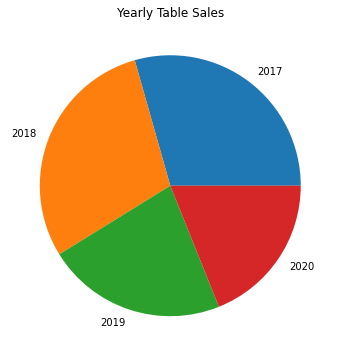

In [45]:
#Figure 39: Basic Pie Chart
JustTableYearSales = JustTablesYears[['Year', 'Sales']].groupby('Year').sum()
#reset_index
JustTableYearSales = JustTableYearSales.reset_index()
#increase size of pie, play with different values
plt.figure(figsize=(6,6))
#title
plt.title('Yearly Table Sales')
#plt.pie tells matplotlib type of graph we need
#JustTablesYearSales.Sales is the dataframe and column that has the data to fill the pie
#JustTablesYearsSales.Year is the dataframe and column that provides labels outside the pie
plt.pie(JustTableYearSales.Sales, labels=JustTableYearSales.Year)
#this is the matplotlib print() function
plt.show

AttributeError: ignored

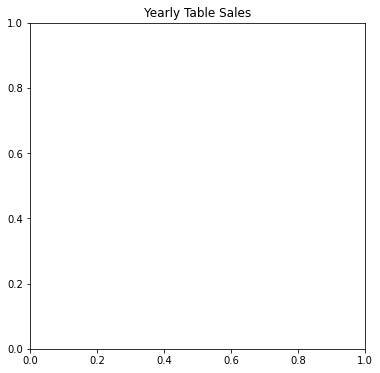

In [46]:
#Figure 40: Not Resetting Index
JustTableYearSales = JustTablesYears[['Year', 'Sales']].groupby('Year').sum()
#reset_index
#JustTableYearSales = JustTableYearSales.reset_index()
plt.figure(figsize=(6,6))
plt.title('Yearly Table Sales')
plt.pie(JustTableYearSales.Sales, labels=JustTableYearSales.Year)
plt.show

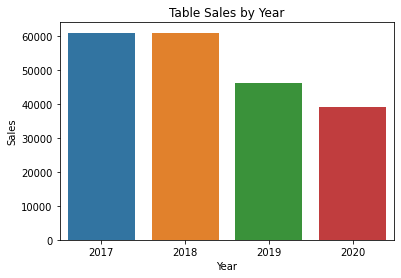

In [47]:
#Figure 41: Basic Bar Chart with Seaborn
JustTableYearSales = JustTablesYears[['Year', 'Sales']].groupby('Year').sum()
JustTableYearSales = JustTableYearSales.reset_index()
#this line tells seaborn what to plot on x and y axis, and which dataframe has the data
barchart1 = sns.barplot(x='Year', y='Sales', data = JustTableYearSales)
#title
barchart1.set_title('Table Sales by Year')
#adding plt.show is optional, though good habit
plt.show()